## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Studio Analysis

### Authored by: Mandela Odhiambo

#### Student Pace: Full Time

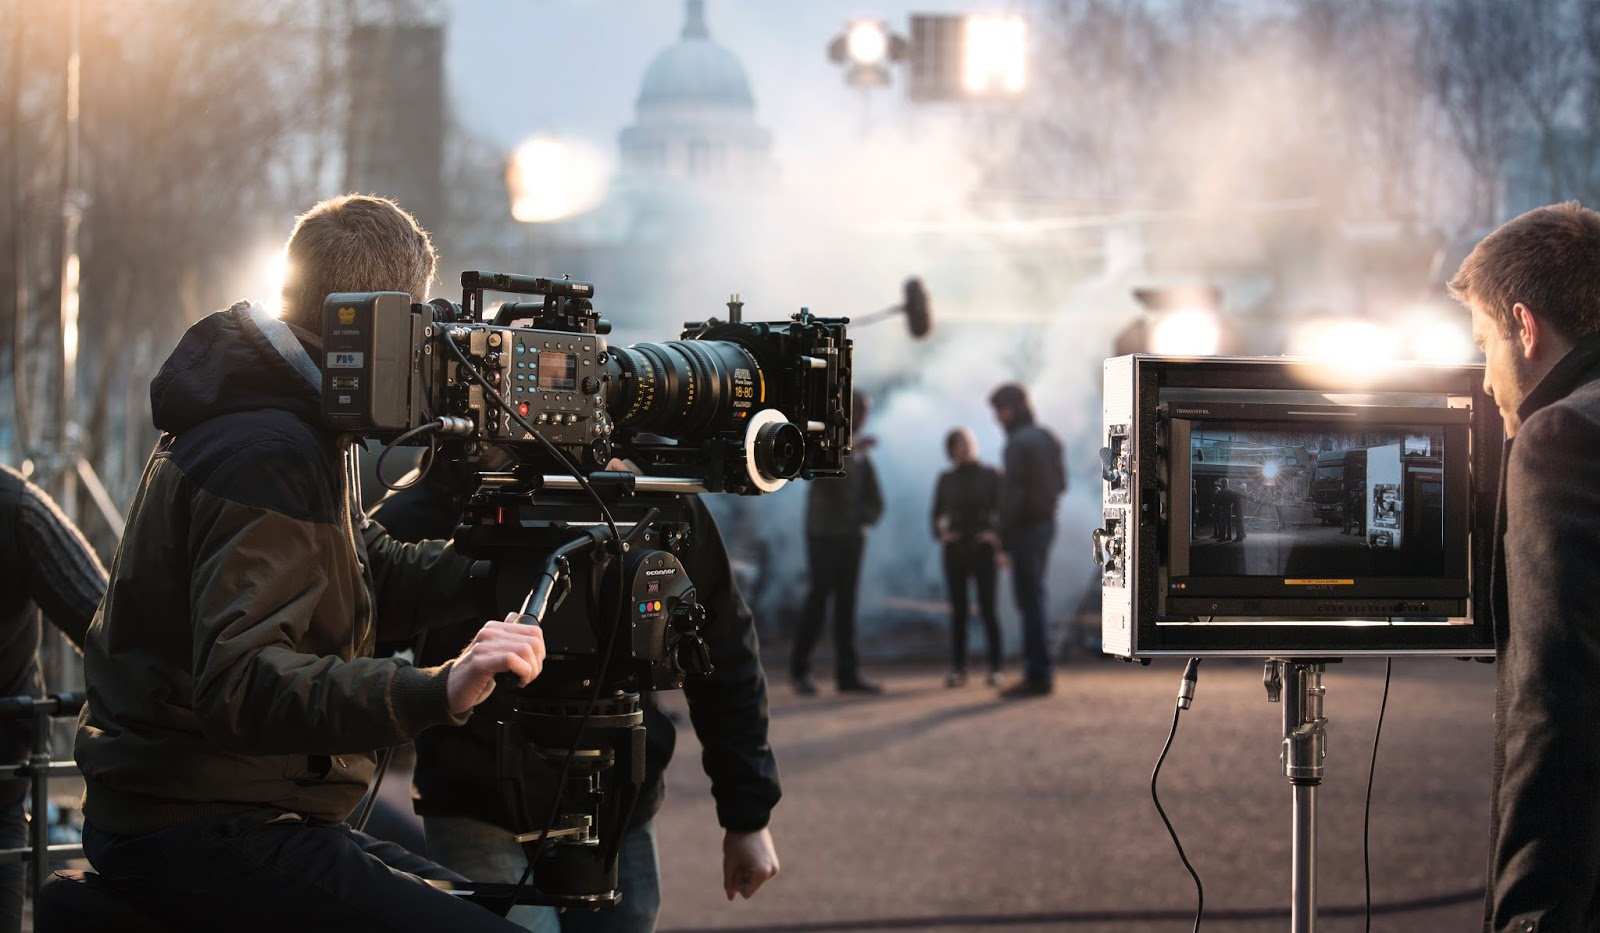

### Project Overview

This analysis seeks to offer Microsoft insight on the movie industry as it looks to find ways to penetrate the already saturated market. 

Insights are retrieved from datasets containing information on movies such as the movie directors, the year of release, the genres, domestic grossings, production budget, foreign grossing, and worldwide grossing.

From the insights in the data analyzed, Microsoft needs to invest heavily on acquiring the best directors and focusing on the genres that will guarantee the highest revenue. 

### Industry Understanding

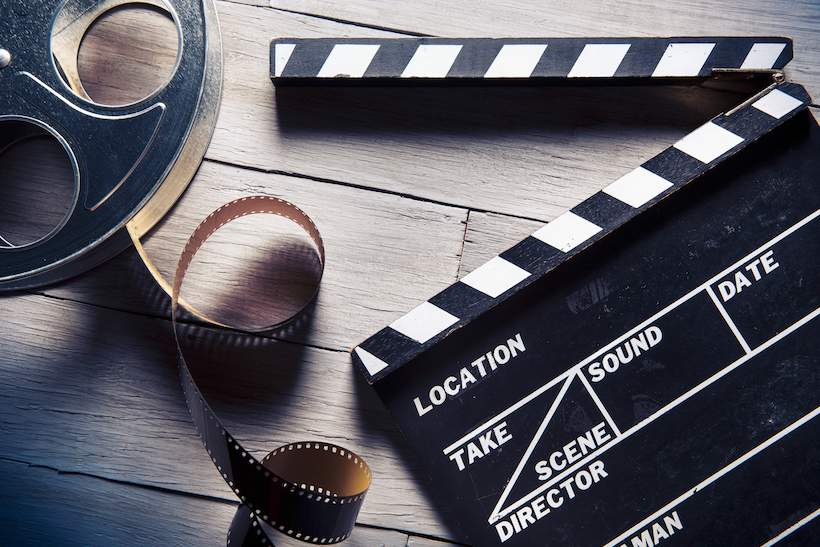

- Competition in the film industry is extremely high.
- Return on investment correlates with investment in the right genres and acquisition of the right directors.
- There is no guarantee that investing in the film industry will be profitable long-term considering people have platforms like Netflix and Amazon. 

### Data Understanding

The dataset for this project entailed three csv files and an sqlite database. 

From the database, several tables were used. The tables that were used include: bom_movie_gross, directors, movie_basics, movie_ratings, persons, tmdb_movies, and tn_movie_budgets. 

Of the three csv files, all of them were found relevant for the project. 

In [148]:
#Importing the necessary libraries.

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [72]:
df = pd.read_csv('tmdb.movies.csv', index_col='Unnamed: 0')

In [73]:
new_df = pd.read_csv('bom.movie_gross.csv')

In [74]:
new_df2 = pd.read_csv('tn.movie_budgets.csv', index_col=0)

In [75]:
#Creating a connection to the DB

conn = sqlite3.connect('im.db')

### Determining the Best Genres by Revenue Accrual

In [146]:

genres_revenue_query = """
        --select director, count(1) No_of_Movies from
        SELECT genres,sum(Revenue) Rev from
            (
                SELECT DISTINCT mb.movie_id ,
                    tm.original_title ,tm.release_date ,p.primary_name director
                    ,tm.original_language ,tm.vote_average ,tm.vote_count ,mb.genres ,mb.start_year , 
                    (bmg.domestic_gross +bmg.foreign_gross) Revenue
                FROM tmdb_movies tm 
                JOIN movie_basics mb ON tm.original_title = mb.original_title 
                LEFT JOIN directors d ON mb.movie_id =d.movie_id 
                JOIN persons p ON d.person_id =p.person_id 
                JOIN bom_movie_gross bmg ON tm.original_title =bmg.title 
            )
        GROUP BY director
        --, start_year
        --director
        ORDER BY 2 DESC
        LIMIT 10;
"""

genres_revenue = pd.read_sql(genres_revenue_query, conn)
genres_revenue

,genres,Rev
0,"Animation,Comedy,Family",3.708100e+09
1,"Action,Adventure,Sci-Fi",3.115800e+09
2,"Adventure,Family,Fantasy",2.953500e+09
3,"Action,Adventure,Sci-Fi",2.885000e+09
4,"Action,Adventure,Sci-Fi",2.833300e+09
5,"Adventure,Animation,Comedy",2.552800e+09
6,"Adventure,Animation,Comedy",2.552800e+09
7,"Adventure,Drama,Sport",2.552800e+09
8,Drama,2.546411e+09
9,Drama,2.546411e+09


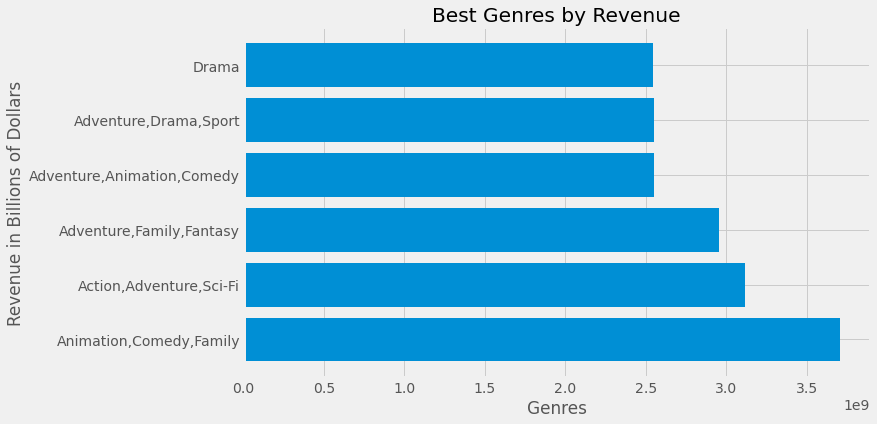

In [174]:
#Plotting the graph for Best Performing Genres 

fig, ax = plt.subplots(figsize = (10, 6))

ax.barh(genres_revenue.genres, genres_revenue.Rev)
ax.set_title('Best Genres by Revenue')
ax.set_xlabel('Genres')
ax.set_ylabel('Revenue in Billions of Dollars')

plt.show();

The graph above showcases the genres that performed well by revenue. 

For the sake of Microsoft, it is crucial to have an idea of the genres that could offer the highest returns on investment. 

### Analysing Directors - On Revenue Accrual and the Average of their Ratings

In [113]:
#Getting the Best Directors on Revenue Accrual

directors_revenue_query = """
        --select director, count(1) No_of_Movies from
        --select genres,sum(Revenue) Rev from
        --start_year,count(1) No_of_Movies from
        SELECT director,sum(Revenue) Rev from
        (
            SELECT DISTINCT mb.movie_id ,
                tm.original_title ,tm.release_date ,p.primary_name director
                ,tm.original_language ,tm.vote_average ,tm.vote_count ,mb.genres ,mb.start_year , 
                (bmg.domestic_gross +bmg.foreign_gross) Revenue
            FROM tmdb_movies tm 
            JOIN movie_basics mb ON tm.original_title = mb.original_title 
            LEFT JOIN directors d ON mb.movie_id =d.movie_id 
            JOIN persons p ON d.person_id =p.person_id 
            JOIN bom_movie_gross bmg ON tm.original_title =bmg.title 
        )
        GROUP BY director
        --, start_year
        --director
        ORDER BY 2 DESC
        LIMIT 10;
"""

directors_revenue = pd.read_sql(directors_revenue_query, conn)
directors_revenue

,director,Rev
0,Pierre Coffin,3.708100e+09
1,Christopher Nolan,3.115800e+09
2,Peter Jackson,2.953500e+09
3,Ryan Coogler,2.885000e+09
4,Michael Bay,2.833300e+09
5,Jennifer Lee,2.552800e+09
6,Chris Buck,2.552800e+09
7,Adam Green,2.552800e+09
8,Joe Russo,2.546411e+09
9,Anthony Russo,2.546411e+09


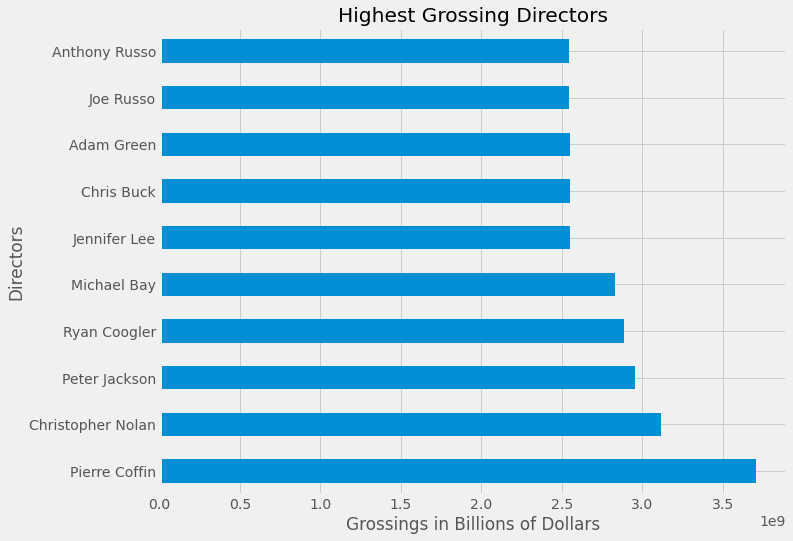

In [172]:
#Getting,Setting, and Plotting a Bar Chart to Compare the Directors' Revenue Accrual

directors_revenue_plotting = directors_revenue.set_index('director')
directors_revenue_plotting

plt.figure(figsize = (10, 8))

directors_revenue_plotting['Rev'].plot(kind='barh')
plt.title('Highest Grossing Directors')
plt.xlabel('Grossings in Billions of Dollars')
plt.ylabel('Directors')
plt.show();

For Microsoft, it is crucial to have an understanding of the most successful directors.

This graph offers a summary of the directors whose movies have grossed the highest in terms of returns. 

Such statistic is crucial for Microsoft as it helps to showcase the people that the company can choose to work with upon opening their studio. 

#### Directors by the Average of their Ratings

In [169]:
#Getting the best directors by the Average of their Ratings

directors_query = """
        SELECT DISTINCT primary_name, COUNT(primary_name) AS Appearance, AVG(averagerating) AVG_R
            FROM persons p 
            JOIN directors d 
                ON p.person_id = d.person_id
            JOIN movie_basics mb 
                ON d.movie_id = mb.movie_id 
            JOIN movie_ratings mr 
                ON mb.movie_id = mr.movie_id
            GROUP BY primary_name
            HAVING AVG_R > 7.5
            ORDER BY Appearance DESC;
"""

directors = pd.read_sql(directors_query, conn)
directors.head(10)

,primary_name,Appearance,AVG_R
0,Joe Russo,31,8.180645
1,Anthony Russo,30,8.246667
2,Sylvia Broeckx,28,9.000000
3,Erin Korbylo,28,9.000000
4,Dennis Korbylo,28,9.000000
5,Declan Lynch,26,7.688462
6,Sukumar,25,7.968000
7,Roger Lay Jr.,24,7.529167
8,Rich Moore,23,7.595652
9,Pauli Janhunen Calderón,23,8.152174


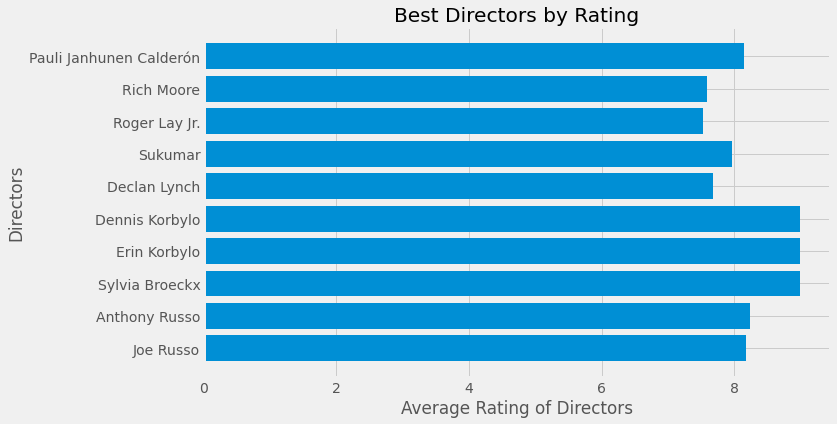

In [176]:
#Plotting the Graph for the Best Directors by Rating

fig, ax = plt.subplots(figsize = (10, 6))

ax.barh(best_directors_by_rating.primary_name, best_directors_by_rating.AVG_R)
ax.set_title('Best Directors by Rating')
ax.set_xlabel('Average Rating of Directors')
ax.set_ylabel('Directors')

plt.show();

This bar chart shares a summary of the best directors in the film industry by their ratings. 

Ratings may not necessarily offer the correct summary of how a director is performing in the industry. However, it can be a great measure of success or failure, especially when combined with the number of films.

The chart above represents directors who have directed more than 20 movies and received a rating of more than 7.5. For Microsoft, this is an important analysis because it captures experience and excellence in one graph. 

### Analysing Worldwide Gross Against Production Cost to Determine if a Correlation Exists

In [88]:
new_df2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [89]:
directors_revenue.isna().sum()

movie              0
grs                0
grss               0
worldwide_gross    0
dtype: int64

In [90]:
new_df2.duplicated().value_counts()

False    5782
dtype: int64

In [91]:
new_df2.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [92]:
#Removing Unwanted Characters

def remove_unwanted(df, characters_to_remove):
    """Function to remove unwanted characters from the columns"""
    
    
    for col in df.columns:
        df[col] = df[col].apply(lambda x: ''.join([b for b in x if b not in characters_to_remove]))
        
    return df

In [131]:
#Calling the Function

new_df2 = remove_unwanted(new_df2, ['$', ','])
new_df2

TypeError: 'float' object is not iterable

In [94]:
#Dropping the release_date column

new_df2.drop('release_date', axis=1, inplace=True)
new_df2

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000,760507625,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Dark Phoenix,350000000,42762350,149762350
4,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
78,Red 11,7000,0,0
79,Following,6000,48482,240495
80,Return to the Land of Wonders,5000,1338,1338


In [95]:
#Converting the production_budget, domestic_gross, and worldwide_gross columns to float

new_df2[['production_budget', 'domestic_gross', 'worldwide_gross']] = new_df2[['production_budget', 'domestic_gross', 'worldwide_gross']].astype(float)
new_df2

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [96]:
#Adding a new column to track returns from every movie

new_df2['returns'] = new_df2['worldwide_gross'] - new_df2['production_budget']

In [97]:
#Adding a new column to track Return on Investment for every Movie

new_df2['Movie_ROI'] = round((new_df2['worldwide_gross'] - new_df2['production_budget']) / new_df2['production_budget'], 2)
new_df2

,movie,production_budget,domestic_gross,worldwide_gross,returns,Movie_ROI
id,,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.53
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.55
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.57
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.24
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.15
...,...,...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-1.00
79,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,39.08
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-0.73


In [98]:
#Retrieving the Movies with the Highest ROI
#Plotted from Number 2: The First Value was an Outlier

movies_with_highest_ROI = new_df2.sort_values('Movie_ROI', ascending = False).head(10).iloc[1:]
movies_with_highest_ROI

,movie,production_budget,domestic_gross,worldwide_gross,returns,Movie_ROI
id,,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,99550000.0,497.75
93,Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,430.52
80,The Gallows,100000.0,22764410.0,41656474.0,41556474.0,415.56
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,412.83
10,Super Size Me,65000.0,11529368.0,22233808.0,22168808.0,341.06
47,Bambi,858000.0,102797000.0,268000000.0,267142000.0,311.35
74,El Mariachi,7000.0,2040920.0,2041928.0,2034928.0,290.70
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,29973064.0,262.92
11,Rocky,1000000.0,117235147.0,225000000.0,224000000.0,224.00


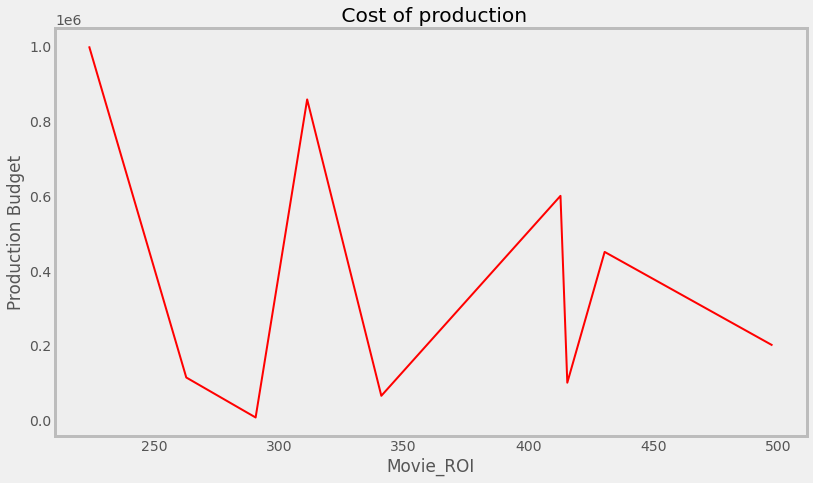

In [122]:
#Visualizing the Top 10 Highest Grossing Films against their Production Budget
#Seeks to determine if there is any correlation between Production Budget and Revenue Generated
plt.style.use('bmh')
plt.figure(figsize= (12, 7))

sns.lineplot(x='Movie_ROI',y='production_budget', data=movies_with_highest_ROI, color = 'red')

plt.xlabel('Movie_ROI')
plt.ylabel('Production Budget')
plt.title(' Cost of production')
plt.grid();

This line graph seeks to showcase a relationship between production budget and return on investment on movie production. 

From the line graph, there appears to be no correlation between production budget and return on investment. Such a graphic is crucial to Microsoft as it helps to show them that other factors like the choice of director, investment in marketing, and the genre of choice impact grossings. 

Therefore, this will go a long way in helping Microsoft focus on the aspects that will guarantee it success.

### Finding the Top 10 Highest Grossing Films

In [100]:
#Finding the top 10 Highest Grossing Films
#Cleaning the data using SQL and picking the 10 Highest Grossing Films

revenue_accrual = """SELECT * FROM 
    (
        SELECT movie ,SUBSTR(worldwide_gross,2) grs, 
            CAST((REPLACE(SUBSTR(worldwide_gross,2),',','')) AS float) grss
            , worldwide_gross
        FROM tn_movie_budgets tmb )
    ORDER BY grss desc
    --order by 2 desc
    LIMIT 10;"""

directors_revenue = pd.read_sql(revenue_accrual, conn)
directors_revenue

,movie,grs,grss,worldwide_gross
0,Avatar,"2,776,345,279",2.776345e+09,"$2,776,345,279"
1,Titanic,"2,208,208,395",2.208208e+09,"$2,208,208,395"
2,Star Wars Ep. VII: The Force Awakens,"2,053,311,220",2.053311e+09,"$2,053,311,220"
3,Avengers: Infinity War,"2,048,134,200",2.048134e+09,"$2,048,134,200"
4,Jurassic World,"1,648,854,864",1.648855e+09,"$1,648,854,864"
5,Furious 7,"1,518,722,794",1.518723e+09,"$1,518,722,794"
6,The Avengers,"1,517,935,897",1.517936e+09,"$1,517,935,897"
7,Avengers: Age of Ultron,"1,403,013,963",1.403014e+09,"$1,403,013,963"
8,Black Panther,"1,348,258,224",1.348258e+09,"$1,348,258,224"
9,Harry Potter and the Deathly Hallows: Part II,"1,341,693,157",1.341693e+09,"$1,341,693,157"


In [101]:
grouping_highest_grossing_films = directors_revenue.set_index('movie')
grouping_highest_grossing_films

,grs,grss,worldwide_gross
movie,,,
Avatar,"2,776,345,279",2.776345e+09,"$2,776,345,279"
Titanic,"2,208,208,395",2.208208e+09,"$2,208,208,395"
Star Wars Ep. VII: The Force Awakens,"2,053,311,220",2.053311e+09,"$2,053,311,220"
Avengers: Infinity War,"2,048,134,200",2.048134e+09,"$2,048,134,200"
Jurassic World,"1,648,854,864",1.648855e+09,"$1,648,854,864"
Furious 7,"1,518,722,794",1.518723e+09,"$1,518,722,794"
The Avengers,"1,517,935,897",1.517936e+09,"$1,517,935,897"
Avengers: Age of Ultron,"1,403,013,963",1.403014e+09,"$1,403,013,963"
Black Panther,"1,348,258,224",1.348258e+09,"$1,348,258,224"


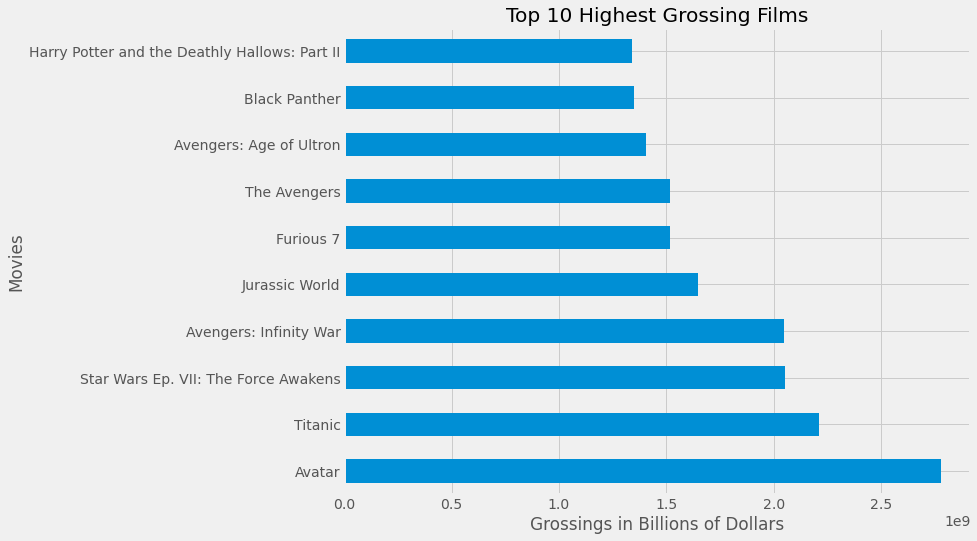

In [175]:
#Plotting

plt.figure(figsize = (10, 8))

grouping_highest_grossing_films['grss'].plot(kind='barh')
plt.title('Top 10 Highest Grossing Films')
plt.xlabel('Grossings in Billions of Dollars')
plt.ylabel('Movies')
plt.show();

The highest grossing films paint a picture of the film industry and its potential to be a key investment angle for a company like Microsoft. 

Therefore, this bar chart affirms that the film industry offers a great investment opportunity and one that is highly rewarding, especially if a company focuses on the right elements of success. 

### Analysis of the Best Studios

In [151]:
new_df = pd.read_csv('bom.movie_gross.csv')
new_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [153]:
#Checking the types of the columns
new_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

#### Cleaning Data

In [154]:
#Removing unwanted characters from the Foreign Gross Column

def unwanted_chars(df, column_name, chars_to_remove):
    """Function to remove unwanted characters from the column foreign_gross"""
    
    for char in chars_to_remove:
        df[column_name] = df[column_name].str.replace(char, '')
        
    return df

new_df = unwanted_chars(new_df, 'foreign_gross', ['.', ','])
new_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [156]:
#Converting the Foreign Gross Column to Float

new_df.foreign_gross = new_df.foreign_gross.astype(float)

In [158]:
#Confirming the conversion worked

new_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [159]:
#Checking for null values

new_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [160]:
#Filling the missing foreign gross values with zeros

new_df.foreign_gross.fillna(value = 0, inplace = True)
new_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [161]:
#Creating a new column to capture the total gross.

new_df['total_gross'] = new_df.domestic_gross + new_df.foreign_gross
new_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [162]:
grouping_studios = new_df.groupby('studio')['total_gross'].sum()
grouping_studios

studio
3D        16000000.0
A23         164200.0
A24      562656400.0
ADC         248200.0
AF         5642900.0
            ...     
XL          458000.0
YFG        1100000.0
Yash     304392100.0
Zee        1671000.0
Zeit.     25963500.0
Name: total_gross, Length: 257, dtype: float64

In [163]:
#Sorting the Studios to get the Best Performing Studio
#And converting the resulting series to a dataframe

sorted_studios = grouping_studios.sort_values(ascending = False)
top_10_studios = sorted_studios.head(10)
top_10_studios

studio
BV         4.421291e+10
Fox        3.100537e+10
WB         3.083595e+10
Uni.       2.975719e+10
Sony       2.240492e+10
Par.       1.954926e+10
WB (NL)    1.033470e+10
LGF        8.594583e+09
LG/S       5.431924e+09
P/DW       5.076500e+09
Name: total_gross, dtype: float64

#### Plotting for the Studios

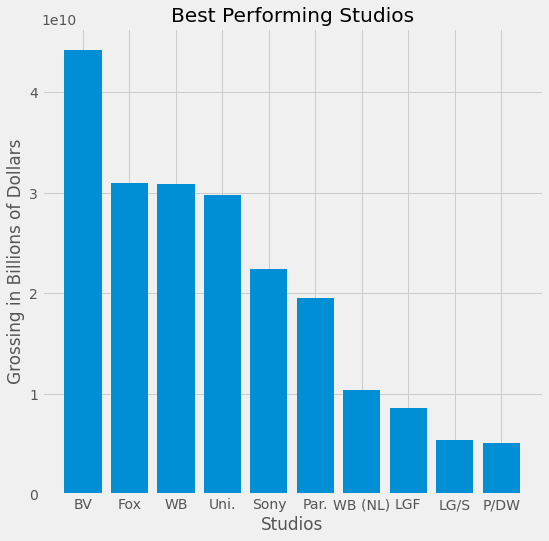

In [164]:
#Plotting for the Best Performing Studios

fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(top_10_studios.index, top_10_studios.values)
ax.set_title('Best Performing Studios')
ax.set_xlabel('Studios')
ax.set_ylabel('Grossing in Billions of Dollars')

plt.show()

Competition in the film industry is quite steep, especially because of companies that have been in business for decades and seem to have developed some sort of monopoly in the industry.

The bar chart above offers Microsoft an overview of its potential competition should it choose to enter the film industry. 

Some of these studios have grossed close to $50 billion dollars in the last decade and appear to not be slowing down any time soon. Therefore, this graphic is indeed crucial and offers Microsoft a clearer picture of the industry and what it will be up against if or when it decides to join the industry. 

## Conclusion

### Recommendations from the Analysis

#### Work with highly experienced directors.
Directors know what the audiences want. Therefore, with the right directors, Microsoft can build a dynasty to rival the most popular movie entities. 

#### Focus on the most popular genres.
The choice of genre matters a lot. The more popular a genre is the higher the chances that more people will tune in to watch a movie. So, Microsoft needs to focus on the most popular genres. 

#### Invest in developing a great studio that can rival the current most popular and successful studios.
The studios that gross the highest happen to invest heavily in the production process. In an industry that already has established leaders, it will take Microsoft time and money to find a way to rival its potential competition. Therefore, there is need for a well-established studio.